In [628]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

import seaborn as sns


In [629]:
CNT_POINTS = 20
x = np.linspace(-10, 10, CNT_POINTS)
y = x * 2 + 3 + (np.random.rand(CNT_POINTS)-0.5) * 6
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.5)
x_train.shape, x_test.shape, y_train.shape, y_test.shape, x_train[:3], y_train[:3]

((10,),
 (10,),
 (10,),
 (10,),
 array([ 7.89473684, -5.78947368,  3.68421053]),
 array([ 15.99734504, -10.25800181,  12.10041242]))

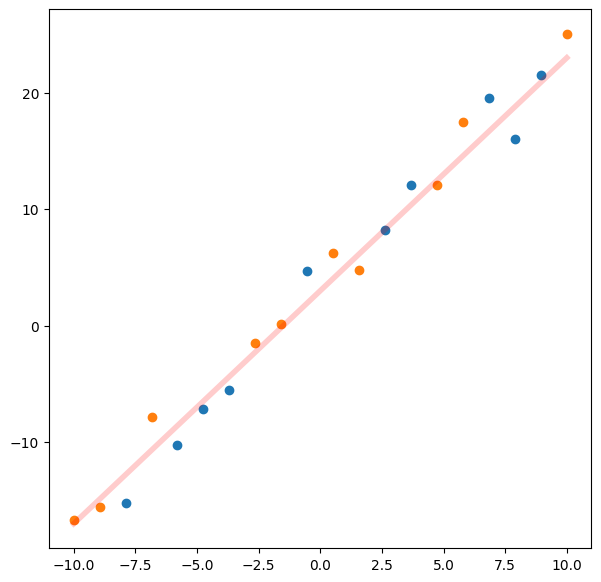

In [630]:

plt.figure(figsize=(7,7))
plt.scatter(x_train, y_train, label="Train")
plt.scatter(x_test, y_test, label="Test")
plt.plot(x,x*2+3, color="red", lw=4, alpha=0.2)
# legend_box = plt.legend
plt.show()

D:\_Work\_Projects\_Conda\School\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
D:\_Work\_Projects\_Conda\School\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
D:\_Work\_Projects\_Conda\School\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


<bound method Figure.show of <Figure size 2000x2000 with 6 Axes>>

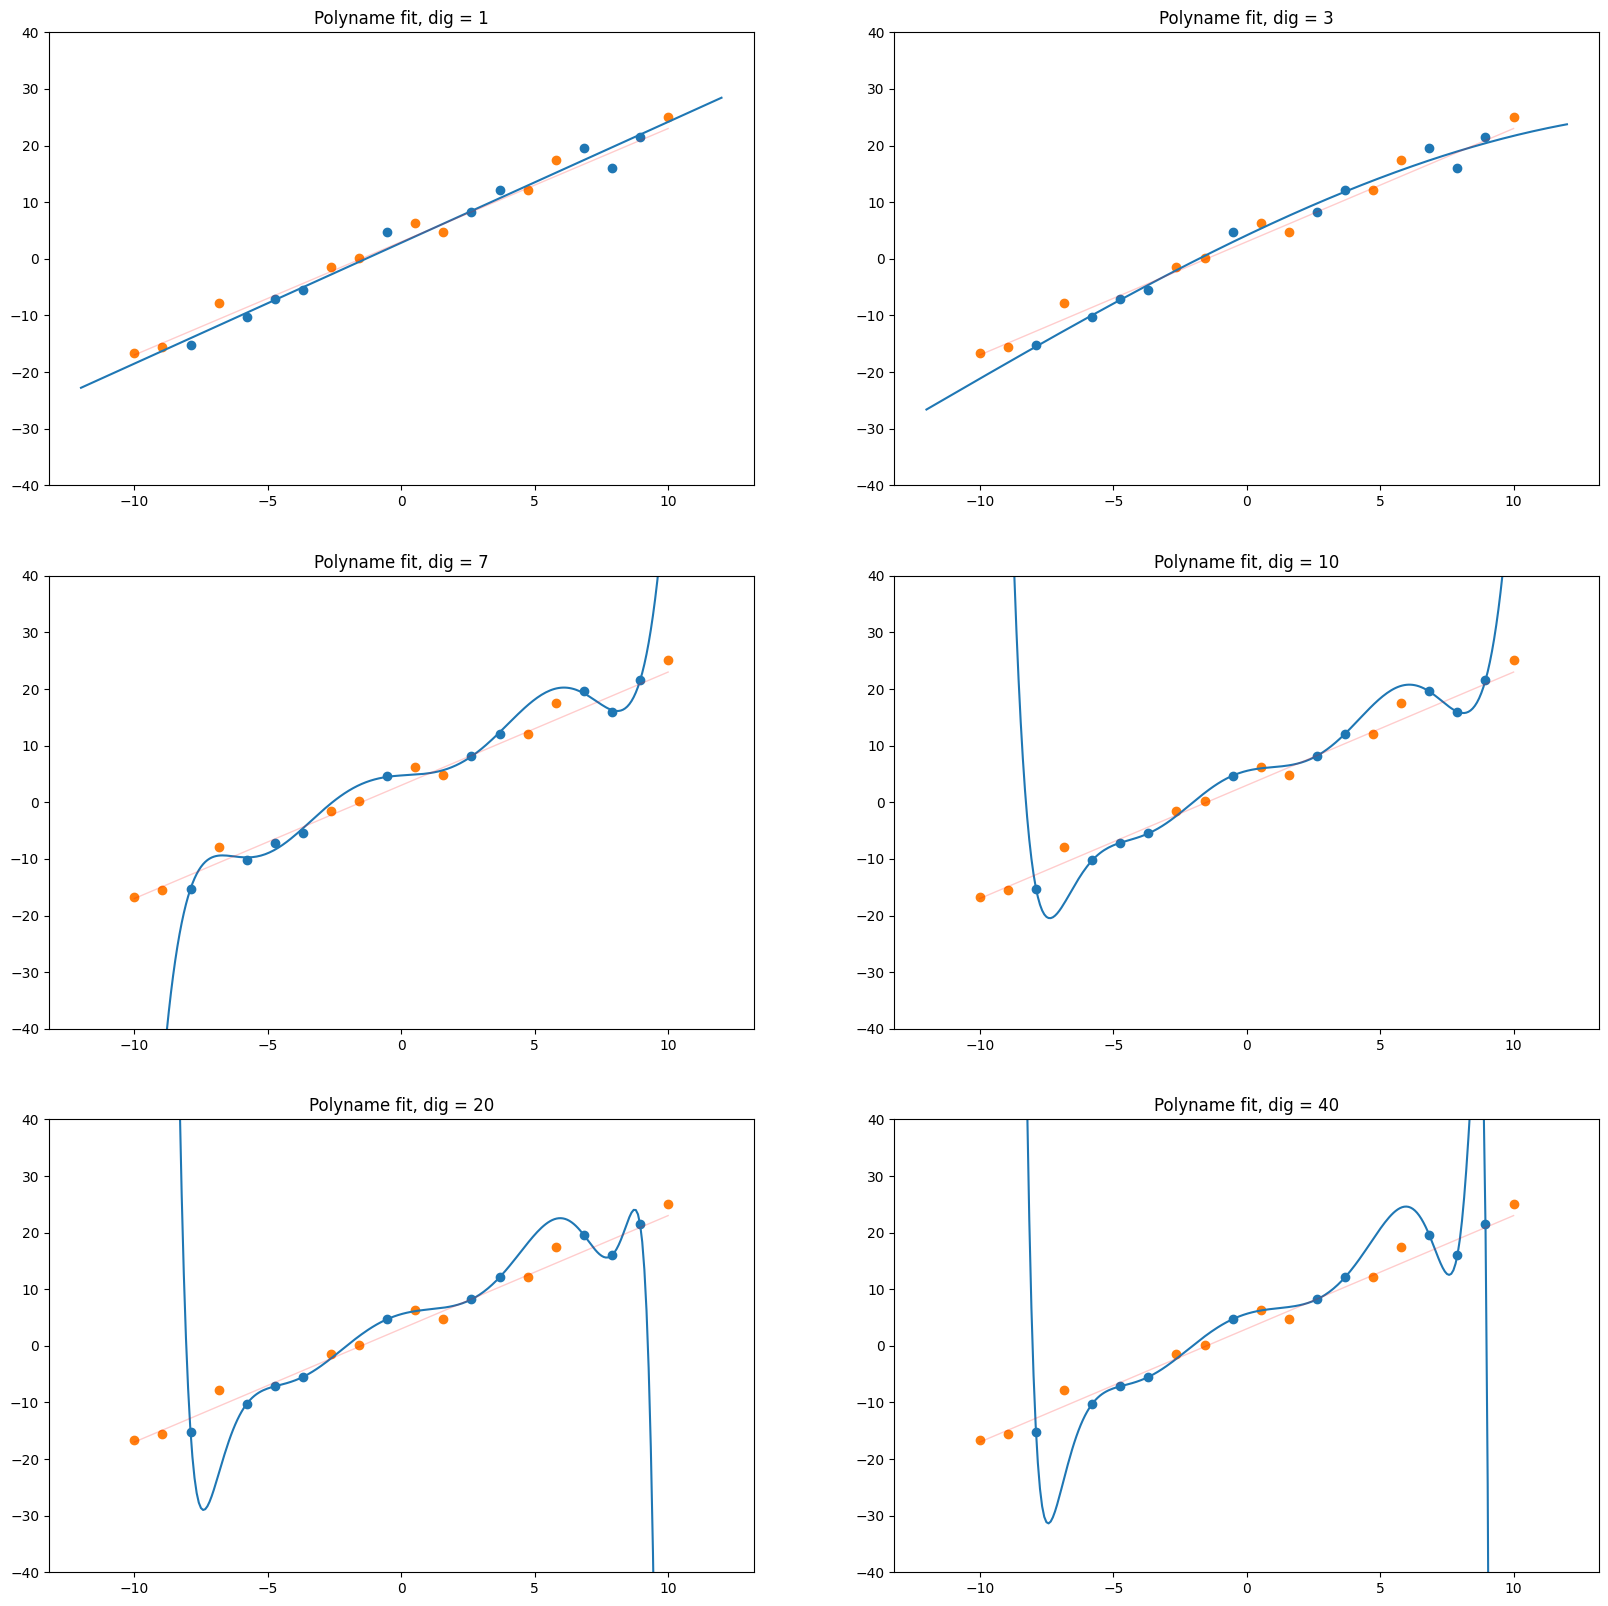

In [631]:
grid = np.linspace(-12,12,300)

fig, ax = plt.subplots(3,2,figsize=(20,20))
ax = ax.ravel()
for i, deg in enumerate([1,3,7,10,20,40]):
    poly = np.polyfit(x_train,y_train,deg)
    ax[i].set_title(f"Polyname fit, dig = {deg}")
    ax[i].scatter(x_train,y_train,label=f"train mse:{round(mean_squared_error(y_train, np.polyval(poly, x_train)),5)}")
    ax[i].scatter(x_test,y_test,label=f"test mse:{round(mean_squared_error(y_test, np.polyval(poly, x_test)),5)}")
    ax[i].set_ylim(-40, 40)
    ax[i].plot(grid, np.polyval(poly, grid))
    ax[i].plot(x, x*2+3, color="red", lw=1, alpha=0.2)
fig.show


## Готовим данные для обучения

In [632]:
import pandas as pd

In [633]:
df = pd.read_csv("adult.data", sep=",", names=["age", "workclass", "fnlwgt", "education", 
                                               "educ-num", "marital-status", "occupation",
                                               "relationship", "race", "sex", "capital-gain",
                                               "capital-loss", "hours-per-week", "native-country",
                                               "salary",
                                              ])
num_cols = ["age", "fnlwgt", "hours-per-week", "educ-num", "capital-gain", "capital-loss"]
cat_cols = ["workclass", "education", "marital-status", "occupation",
            "relationship", "race", "native-country","sex"]
# bin_cols = ["sex"]
target_colname = "salary"

# Удаляем лишние пробелы вначале и в конце строк
df[cat_cols] = df[cat_cols].apply(lambda x: x.str.strip())
df[bin_cols] = df[bin_cols].apply(lambda x: x.str.strip())
df[[target_colname]] = df[[target_colname]].apply(lambda x: x.str.strip())

# Change binary columns from text to 0/1
df[target_colname] = np.where(df[target_colname] == ">50K", 1, 0)
# df[["sex"]] = np.where(df[["sex"]] == "Male", 1, 0)
y_data = df[target_colname]

df.head(3)


,age,workclass,fnlwgt,education,educ-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0


In [634]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
educ-num          0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [635]:
# Change nan/"?" "workclass" on populat categorical: "Private"
# df.groupby("workclass")["age"].count()
# df[df["workclass"]=="?"] = "Private"
df["workclass"] = np.where(df["workclass"]=="?", "Private", df["workclass"])

In [636]:
# Change nan/"?" "native-country" on unknow categorical: "Private"
# df.groupby("native-country")["age"].count()
df["native-country"] = np.where(df["native-country"]=="?", "Private", df["native-country"])

In [637]:
# Change nan/"?" "native-country" on unknow categorical: "Private"
df.groupby("occupation")["age"].count()
df["occupation"] = np.where(df["occupation"]=="?", "Private", df["occupation"])
# df[df["occupation"]=="?"] = "Private"

In [638]:
# Convert categorical columns to one-hot encoding
# Pandas "get_dummies"
# df_cat_ohe = pd.get_dummies(df[cat_cols])
# x_data = pd.concat([df, df_cat_ohe],axis=1)
# x_data = x_data.drop(columns=cat_cols)

# sklearn "OneHotEncoder"
from sklearn.preprocessing import OneHotEncoder
sk_ohe = OneHotEncoder( handle_unknown="ignore", drop="first", sparse=False, dtype=int)
sk_ohe = sk_ohe.fit(df[cat_cols])
df_cat_ohe_sklearn = pd.DataFrame(sk_ohe.transform(df[cat_cols]), columns=sk_ohe.get_feature_names_out())

In [639]:
x_data = pd.concat([df, df_cat_ohe_sklearn],axis=1)
x_data = x_data.drop(columns=(cat_cols+[target_colname]))
x_data.shape, y_data.shape

((32561, 99), (32561,))

In [640]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, shuffle=True, random_state=53)
x_data.shape, y_data.shape, x_train.shape, x_test.shape, y_train.shape, y_test.shape

((32561, 99), (32561,), (26048, 99), (6513, 99), (26048,), (6513,))

In [641]:
# Нормализация 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Обучаем нормализацию на train!!
scaler.fit(x_train[num_cols])
x_train[num_cols] = scaler.transform(x_train[num_cols])
x_test[num_cols] = scaler.transform(x_test[num_cols])

In [642]:
# Готовим данные для Catboost. Категориальные данные передаются без предобработки и перевода в OHE
# Создаем x_data_cb без target
x_data_cb = df.drop(columns=([target_colname]))

# Делим на train/test
x_train_cb, x_test_cb = train_test_split(x_data_cb, test_size=0.2, shuffle=True, random_state=53)

# нормализируем числовые фичи
x_train_cb[num_cols] = scaler.transform(x_train_cb[num_cols])
x_test_cb[num_cols] = scaler.transform(x_test_cb[num_cols])

x_data_cb.shape, y_data.shape, x_train_cb.shape, x_test_cb.shape, y_train.shape, y_test.shape

((32561, 14), (32561,), (26048, 14), (6513, 14), (26048,), (6513,))

## Готовим модель

In [643]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [644]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [645]:
# models = [KNeighborsClassifier(), DecisionTreeClassifier()]
# params_models

params_models = [
    {"name": "KNeighborsClassifier",
    "model": KNeighborsClassifier(),
    "param": {
        "n_neighbors": np.array(np.linspace(4, 10, 8), dtype=int),
#         "algorithm": ["ball_tree", "kd_tree", "brute"],
    },
    },
    {"name": "DecisionTreeClassifier",
    "model": DecisionTreeClassifier(),
    "param": {"max_depth": np.array(np.linspace(1, 30, 2), dtype=int),},
    },
]

In [646]:
for param in params_models:
    print(param)
    model_grid_search = GridSearchCV(estimator=param["model"], param_grid=param["param"], cv=5, scoring="f1",  verbose=7)
    model_grid_search.fit(x_train, y_train)
    mean_score = model_grid_search.cv_results_["mean_test_score"]
    error = model_grid_search.cv_results_["std_test_score"]
    
    print(f"mean_score: {mean_score}")
    print(f"std_test_score: {error}")
    
    print("BEST:")
    print(model_grid_search.best_score_)
    print(model_grid_search.best_params_)
    print(model_grid_search.best_estimator_)
    print("-"*30)

{'name': 'KNeighborsClassifier', 'model': KNeighborsClassifier(), 'param': {'n_neighbors': array([ 4,  4,  5,  6,  7,  8,  9, 10])}}
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .....................n_neighbors=4;, score=0.591 total time=   2.0s
[CV 2/5] END .....................n_neighbors=4;, score=0.575 total time=   2.1s
[CV 3/5] END .....................n_neighbors=4;, score=0.573 total time=   2.2s
[CV 4/5] END .....................n_neighbors=4;, score=0.607 total time=   2.8s
[CV 5/5] END .....................n_neighbors=4;, score=0.586 total time=   2.9s
[CV 1/5] END .....................n_neighbors=4;, score=0.591 total time=   2.0s
[CV 2/5] END .....................n_neighbors=4;, score=0.575 total time=   2.0s
[CV 3/5] END .....................n_neighbors=4;, score=0.573 total time=   2.1s
[CV 4/5] END .....................n_neighbors=4;, score=0.607 total time=   2.2s
[CV 5/5] END .....................n_neighbors=4;, score=0.586 total time=   2.

In [647]:
print(model_grid_search.best_score_)
print(model_grid_search.best_params_)
print(model_grid_search.best_estimator_)

0.6179961028009128
{'max_depth': 30}
DecisionTreeClassifier(max_depth=30)


In [648]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

from tqdm.notebook import tqdm

In [649]:
max_trees = 100
n_splits = 5
values = np.arange(1, max_trees + 1)

kf = KFold(n_splits=n_splits, shuffle=True, random_state=53)

for k_train, k_valid in tqdm(kf.split(x_train), total=n_splits):
    scores = []
#     print(f"k_train: {k_train[:30]}")
#     print(f"k_validate: {k_valid[:30]}")
    print(x_train.shape, len(k_train), len(k_valid))
    print(x_train.iloc[k_train].shape)
    
    kfold_x_train = x_train.iloc[k_train]
    kfold_y_train = y_train.iloc[k_train]

    kfold_x_valid = x_train.iloc[k_valid]
    kfold_y_valid = y_train.iloc[k_valid]
    
    forest_model = RandomForestClassifier(n_estimators=max_trees)
    forest_model.fit(kfold_x_train, kfold_y_train)
    trees = forest_model.estimators_
    print(f"trees: {len(trees)}")
    
    for num in tqdm(values):
        random_forest_model = RandomForestClassifier(n_estimators=num)
        random_forest_model.n_classes_ = 2
        random_forest_model.estimators_ = trees[:num]
#         print(f"n_classes_: {random_forest_model.n_classes_}")
#         print("estimators_" ,random_forest_model.estimators_)
        predict = random_forest_model.predict_proba(kfold_x_valid)[:,1]
#         print(f"predict: {predict}")
        print(f"num:{num}, score: {roc_auc_score(kfold_y_valid, predict)}")


  0%|          | 0/5 [00:00<?, ?it/s]

(26048, 99) 20838 5210
(20838, 99)
trees: 100


  0%|          | 0/100 [00:00<?, ?it/s]

num:1, score: 0.7147700049328861
num:2, score: 0.7847379061807843
num:3, score: 0.817019516993063
num:4, score: 0.8347841057489218
num:5, score: 0.8483332463529735
num:6, score: 0.8555195236915505
num:7, score: 0.8611321563590939
num:8, score: 0.8646771558981983
num:9, score: 0.8683497266317265
num:10, score: 0.8708581602274207
num:11, score: 0.8735438537978124


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib

num:12, score: 0.875477017289496
num:13, score: 0.8794810131872224
num:14, score: 0.8818122867856438
num:15, score: 0.8828802456405345
num:16, score: 0.8837206558759032
num:17, score: 0.883967800070744
num:18, score: 0.8848138090419183
num:19, score: 0.8855509425971615


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib

num:20, score: 0.8857441989598749
num:21, score: 0.8873562349621456
num:22, score: 0.8889275801524017
num:23, score: 0.8896324209993383
num:24, score: 0.8901516037678692
num:25, score: 0.8903404611238782


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib

num:26, score: 0.8900275317833233
num:27, score: 0.890397648211034
num:28, score: 0.8914057205882912
num:29, score: 0.8917125513059152
num:30, score: 0.8917456438336224


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib

num:31, score: 0.8919788911663746
num:32, score: 0.8922333337132475
num:33, score: 0.8926354429169894
num:34, score: 0.8933738761787589
num:35, score: 0.8934511587283591


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib

num:36, score: 0.8932108129984249
num:37, score: 0.8935107452737172
num:38, score: 0.8937860831024353
num:39, score: 0.8941097100274757


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:40, score: 0.8940877149939543
num:41, score: 0.8940859154003027
num:42, score: 0.8941190079280099
num:43, score: 0.8940518230983443


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:44, score: 0.8944980223465542
num:45, score: 0.8944169406548003
num:46, score: 0.894400444379659


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:47, score: 0.8944276382392857
num:48, score: 0.8945890018033928
num:49, score: 0.8947670615974913


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:50, score: 0.8950278027221454
num:51, score: 0.8954370103230691
num:52, score: 0.8952578507772945


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:53, score: 0.8954814002998124
num:54, score: 0.8957317437722563
num:55, score: 0.8960331757089248


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:56, score: 0.896010680788278
num:57, score: 0.8959187015571883
num:58, score: 0.8957555383994293


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:59, score: 0.8959765884863198
num:60, score: 0.8961320533823462
num:61, score: 0.8964084909627406


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:62, score: 0.8965820517727097
num:63, score: 0.8966458373699219
num:64, score: 0.8965502589515287


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:65, score: 0.8965564575518847
num:66, score: 0.8965957486799481
num:67, score: 0.8966709317036212


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:68, score: 0.8966320404852585
num:69, score: 0.8966863282270863
num:70, score: 0.8969031792621226


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:71, score: 0.8972100099797465
num:72, score: 0.8973125868178966
num:73, score: 0.8972889921455736


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:74, score: 0.8975205398620991
num:75, score: 0.897506942932286


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:76, score: 0.8974207623918519
num:77, score: 0.897559531057887


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:78, score: 0.8975741277619513
num:79, score: 0.8977348914615081


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:80, score: 0.8976239165196498
num:81, score: 0.8977314922290547


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:82, score: 0.8977972773747687
num:83, score: 0.8980076298771738


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:84, score: 0.8979333466503264
num:85, score: 0.897840667577261


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:86, score: 0.8977564865853291
num:87, score: 0.8977144960667881


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:88, score: 0.8976583087538834
num:89, score: 0.897807775004404


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:90, score: 0.8980041306672955
num:91, score: 0.8979803360401222


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:92, score: 0.8979871345050288
num:93, score: 0.8979090521360278


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:94, score: 0.8977557867433533
num:95, score: 0.8977397903553378


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:96, score: 0.8976814035390809
num:97, score: 0.8979139510298574


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:98, score: 0.8979767368528186
num:99, score: 0.8979129512556066


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:100, score: 0.8977862798580081
(26048, 99) 20838 5210
(20838, 99)
trees: 100


  0%|          | 0/100 [00:00<?, ?it/s]

num:1, score: 0.7269771139920301
num:2, score: 0.8085530523405747
num:3, score: 0.8350367705987561
num:4, score: 0.8538232813276139
num:5, score: 0.8627604253455278
num:6, score: 0.8691897256567368
num:7, score: 0.8770542616282853
num:8, score: 0.8781816208898898
num:9, score: 0.8817923246731193
num:10, score: 0.8839961602734705
num:11, score: 0.8871218397043117


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib

num:12, score: 0.8873224949732036
num:13, score: 0.888967709478943
num:14, score: 0.890355632947853
num:15, score: 0.8910952702884992
num:16, score: 0.8927142994304287
num:17, score: 0.8939166440520343
num:18, score: 0.8949505691745897
num:19, score: 0.8956989349698392


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib

num:20, score: 0.896146466642227
num:21, score: 0.8968522812212854
num:22, score: 0.8981792046949564
num:23, score: 0.8985426258048032
num:24, score: 0.898424295732738
num:25, score: 0.8985817054765498


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib

num:26, score: 0.8993258062314817
num:27, score: 0.8998306679806958
num:28, score: 0.9003947443594347
num:29, score: 0.9007374353895985
num:30, score: 0.9009406695200779


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib

num:31, score: 0.9010307313016666
num:32, score: 0.9020131783794593
num:33, score: 0.9030359945597923
num:34, score: 0.90345109208837
num:35, score: 0.9033789831509087


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib

num:36, score: 0.9032655132410656
num:37, score: 0.9038511131953604
num:38, score: 0.9041382595144123
num:39, score: 0.9043807716906064


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:40, score: 0.9045048546077512
num:41, score: 0.9044555586766394
num:42, score: 0.9047533180029931
num:43, score: 0.905163952117285


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:44, score: 0.9050255862744259
num:45, score: 0.9049299700217259
num:46, score: 0.9047599635309297
num:47, score: 0.9049248122985513


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib

num:48, score: 0.9050702204172836
num:49, score: 0.9051072171623635
num:50, score: 0.9051972789439523
num:51, score: 0.9052055114636349
num:52, score: 0.9052432025176037
num:53, score: 0.9050717082220456


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:54, score: 0.9053895033191932
num:55, score: 0.9054033894969712
num:56, score: 0.9056520512661813


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:57, score: 0.9058875211665024
num:58, score: 0.9058004349944376
num:59, score: 0.90565105939634


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:60, score: 0.9058315797074539
num:61, score: 0.9058630219814228
num:62, score: 0.9059206496192014


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:63, score: 0.9058496317385653
num:64, score: 0.9059700447372974
num:65, score: 0.9058631211684067


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:66, score: 0.9057244577645952
num:67, score: 0.9058358447477715
num:68, score: 0.9058298935287238


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:69, score: 0.9060853000128546
num:70, score: 0.9061557227715857
num:71, score: 0.9062505455284127


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:72, score: 0.9062887325173022
num:73, score: 0.9064723276249241
num:74, score: 0.9065558430655603


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:75, score: 0.9064503081144475
num:76, score: 0.9064861146157179


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:77, score: 0.90655415688683
num:78, score: 0.9066585015941332


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:79, score: 0.9066093048500055
num:80, score: 0.9064961325011149


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:81, score: 0.9065640755852429
num:82, score: 0.9066375731404821


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:83, score: 0.9067053178506419
num:84, score: 0.9068671910087396


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:85, score: 0.9070184511595356
num:86, score: 0.9071278544030292


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:87, score: 0.9072355714677929
num:88, score: 0.9073797893427156


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:89, score: 0.9073671925957314
num:90, score: 0.9073573730843028


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:91, score: 0.907555350304623
num:92, score: 0.9076026624960523


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:93, score: 0.9076730852547835
num:94, score: 0.9077241665516098


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:95, score: 0.9078309909335162
num:96, score: 0.9075967112770047


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:97, score: 0.9077010559843078
num:98, score: 0.9076812185874822


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:99, score: 0.9076374771274814
num:100, score: 0.9075242055916067
(26048, 99) 20838 5210
(20838, 99)


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


trees: 100


  0%|          | 0/100 [00:00<?, ?it/s]

num:1, score: 0.7199969369698964
num:2, score: 0.78772497823556
num:3, score: 0.8242560986825912
num:4, score: 0.8411127568270189
num:5, score: 0.8513461731802962
num:6, score: 0.8642112055103546
num:7, score: 0.8721039121746473
num:8, score: 0.8798822140527824
num:9, score: 0.8839149317823226
num:10, score: 0.8859757474089152
num:11, score: 0.8865079030051344


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib

num:12, score: 0.8883680514132255
num:13, score: 0.8898131001025564
num:14, score: 0.8904751591725414
num:15, score: 0.8916490827937853
num:16, score: 0.8924645992640978
num:17, score: 0.8925182328804249
num:18, score: 0.893805133777126


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib

num:19, score: 0.894297115143625
num:20, score: 0.8960984297178362
num:21, score: 0.8961074026422406
num:22, score: 0.8968040278641932
num:23, score: 0.8970933027111896
num:24, score: 0.8974777109498839


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib

num:25, score: 0.897748530122821
num:26, score: 0.8981691359542837
num:27, score: 0.8982046197917017
num:28, score: 0.8987774594428916
num:29, score: 0.899234772692373


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib

num:30, score: 0.8993706921040916
num:31, score: 0.8990403253419246
num:32, score: 0.8991718602564911
num:33, score: 0.8988171238473616
num:34, score: 0.8991413727065256


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib

num:35, score: 0.8990566397499328
num:36, score: 0.8990861076493977
num:37, score: 0.8991694130952899
num:38, score: 0.899385273106249


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:39, score: 0.8994008737589068
num:40, score: 0.9001340024687778
num:41, score: 0.8999804431034


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:42, score: 0.9002097625009661
num:43, score: 0.9003892209890569
num:44, score: 0.9002709415309971
num:45, score: 0.9002718592164475


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:46, score: 0.9007244820736265
num:47, score: 0.900734984473782
num:48, score: 0.9005242227153252


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:49, score: 0.900812375946771
num:50, score: 0.9009886735183101
num:51, score: 0.9009131174162219


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:52, score: 0.9011566099557451
num:53, score: 0.9013828704018096
num:54, score: 0.9019168613689296


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:55, score: 0.9019342973924886
num:56, score: 0.9020054689974246
num:57, score: 0.9019189006699307


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:58, score: 0.9020547181165994
num:59, score: 0.9020121986907279
num:60, score: 0.9020940766259193


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:61, score: 0.9023671390299575
num:62, score: 0.9023550051890014
num:63, score: 0.9024468756990979


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:64, score: 0.9027095376680307
num:65, score: 0.9027878468264703
num:66, score: 0.9031121976506844


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:67, score: 0.9030782432890173
num:68, score: 0.9030861965629213
num:69, score: 0.9033360109355477


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:70, score: 0.9034018803578809
num:71, score: 0.9034512314421059
num:72, score: 0.9036783076085709


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:73, score: 0.9039677863856673
num:74, score: 0.9041619278409656


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:75, score: 0.9042374839430537
num:76, score: 0.9042328955158014


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:77, score: 0.9043374096921043
num:78, score: 0.9040769909542725


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:79, score: 0.9041375581940032
num:80, score: 0.904143370201856


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:81, score: 0.9043242562006477
num:82, score: 0.9043433236650074


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:83, score: 0.9043135498703923
num:84, score: 0.9043451590359082


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:85, score: 0.9044490614219108
num:86, score: 0.9045450105340094


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:87, score: 0.9046994875848375
num:88, score: 0.9048286773032528


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:89, score: 0.9049618436586202
num:90, score: 0.9049149397355966


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:91, score: 0.9050852213691825
num:92, score: 0.9049199360230489


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:93, score: 0.9051043907985924
num:94, score: 0.9050803270467801


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:95, score: 0.904949607852614
num:96, score: 0.9049260539260521


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:97, score: 0.9051523143721165
num:98, score: 0.9052470399036145


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:99, score: 0.9052861944828343
num:100, score: 0.9053642997111737
(26048, 99) 20839 5209
(20839, 99)


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


trees: 100


  0%|          | 0/100 [00:00<?, ?it/s]

num:1, score: 0.7348472304012809
num:2, score: 0.801217749435697
num:3, score: 0.8341381319541884
num:4, score: 0.8492396484242879
num:5, score: 0.8600744975637127
num:6, score: 0.8686459089420733
num:7, score: 0.8748293810323583
num:8, score: 0.8794675816698891
num:9, score: 0.8829709508887126
num:10, score: 0.8848984420293915
num:11, score: 0.886817114311907


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib

num:12, score: 0.8882027125562695
num:13, score: 0.8889969285473287
num:14, score: 0.8905811067272741
num:15, score: 0.8916032642640361
num:16, score: 0.8916156106654648
num:17, score: 0.8916813889722357
num:18, score: 0.8914197282629672


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib

num:19, score: 0.8921035529000763
num:20, score: 0.8921306319822011
num:21, score: 0.8930874262172825
num:22, score: 0.8932383843187837
num:23, score: 0.8940760720930241
num:24, score: 0.8948776544244315


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib

num:25, score: 0.8954771292769905
num:26, score: 0.8967483936190477
num:27, score: 0.896944587275363
num:28, score: 0.8969980191807052
num:29, score: 0.8976928414527005


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib

num:30, score: 0.898042068235967
num:31, score: 0.8979636322739498
num:32, score: 0.8979626985124973
num:33, score: 0.8983498982615022
num:34, score: 0.8985496194610827


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib

num:35, score: 0.8984520932649239
num:36, score: 0.8987040013545767
num:37, score: 0.8988663720960539


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:38, score: 0.8992855272369915
num:39, score: 0.8990736671385275
num:40, score: 0.8994242426883367


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:41, score: 0.8993246414667275
num:42, score: 0.8992411216923575
num:43, score: 0.8993998611392969
num:44, score: 0.8996323677409903


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:45, score: 0.9000258963176183
num:46, score: 0.9004013721728297
num:47, score: 0.9006225698858197


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:48, score: 0.9007116922289052
num:49, score: 0.9009512539171294
num:50, score: 0.9013187409243573


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:51, score: 0.9012361549114399
num:52, score: 0.9011983894482465
num:53, score: 0.9010348774427718


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:54, score: 0.9012877192938771
num:55, score: 0.9013620052049938
num:56, score: 0.9013004807003957


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:57, score: 0.9013378311584992
num:58, score: 0.9015247909515611
num:59, score: 0.9014399224106484


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:60, score: 0.9014293397808525


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:61, score: 0.9014541363349822


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:62, score: 0.9015108882810448
num:63, score: 0.9015703377601927


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:64, score: 0.9015164908497604
num:65, score: 0.901496051849076


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:66, score: 0.901524790951561
num:67, score: 0.9016022931521256


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:68, score: 0.9021508261298825
num:69, score: 0.9021902516134361


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:70, score: 0.9020574499846241


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:71, score: 0.9022131806446606
num:72, score: 0.902123643296485


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:73, score: 0.9019285909041674
num:74, score: 0.9019699876618985


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:75, score: 0.9020409535322951
num:76, score: 0.9020076493738196


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:77, score: 0.9022198207261012
num:78, score: 0.9020943854376373


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:79, score: 0.9021958541821515
num:80, score: 0.9022600762198348


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:81, score: 0.902222414507914
num:82, score: 0.9021976179537842


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:83, score: 0.9024155993773264
num:84, score: 0.9023870677773862


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:85, score: 0.9026031816780232
num:86, score: 0.9028217856092005


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:87, score: 0.9029269893995249


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:88, score: 0.9028231343757431
num:89, score: 0.9029108042010134


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:90, score: 0.9030196392858758
num:91, score: 0.9029285456686126


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:92, score: 0.9030550184698015
num:93, score: 0.9031425845437994


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:94, score: 0.9032314993843399
num:95, score: 0.9032560884359246


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:96, score: 0.9033684510640523
num:97, score: 0.9035165041299232


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:98, score: 0.9035509495523963
num:99, score: 0.9035694172789028


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:100, score: 0.903693088795734
(26048, 99) 20839 5209
(20839, 99)
trees: 100


  0%|          | 0/100 [00:00<?, ?it/s]

num:1, score: 0.7364781987665827
num:2, score: 0.8045651246171251
num:3, score: 0.8376304744128372
num:4, score: 0.8521210317613684
num:5, score: 0.8640582429398276
num:6, score: 0.8723138757608169
num:7, score: 0.8778678740741132
num:8, score: 0.8843929677561351
num:9, score: 0.8854817377521766
num:10, score: 0.8890588633505678
num:11, score: 0.8926017137982197


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib

num:12, score: 0.8935450432436456
num:13, score: 0.8936543779233042
num:14, score: 0.8945747216593323
num:15, score: 0.8957637744406236
num:16, score: 0.8971398658041398
num:17, score: 0.8984669345484977
num:18, score: 0.8993645976951639
num:19, score: 0.9001261773056599


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib

num:20, score: 0.9005043227372603
num:21, score: 0.9010643197104695
num:22, score: 0.9023633174114918
num:23, score: 0.9028705286184286
num:24, score: 0.9028817163530913
num:25, score: 0.9035611169671557


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib

num:26, score: 0.9042957443077823
num:27, score: 0.9046562944839586
num:28, score: 0.9045503161246988
num:29, score: 0.9046698214722326
num:30, score: 0.9047200645715362


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:31, score: 0.9048151603161695
num:32, score: 0.9048522832539139
num:33, score: 0.9054805254085659
num:34, score: 0.9059900758691141
num:35, score: 0.9059554955983383


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:36, score: 0.9062798381968789
num:37, score: 0.9066249289578849
num:38, score: 0.9067842016168108
num:39, score: 0.9069570012640107


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:40, score: 0.9071327504048943
num:41, score: 0.907106611788455
num:42, score: 0.9069414401421615
num:43, score: 0.906920793686375


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:44, score: 0.9070371461268674
num:45, score: 0.9069234380600224
num:46, score: 0.9071629572884836


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:47, score: 0.9071462773931684
num:48, score: 0.9076009062471904
num:49, score: 0.9074665517245588


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:50, score: 0.9076165690757182
num:51, score: 0.9074725524186052
num:52, score: 0.9077003753790099


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:53, score: 0.9078695135857748
num:54, score: 0.9080643835822638
num:55, score: 0.908254676778209
num:56, score: 0.9082820358747934


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:57, score: 0.9085260301971197
num:58, score: 0.9087640238253998


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:59, score: 0.9088715277848408
num:60, score: 0.9089001073615701


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:61, score: 0.9090098488679437
num:62, score: 0.909133625895985


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:63, score: 0.908966216702759
num:64, score: 0.9088825121061459
num:65, score: 0.9090401574582117


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:66, score: 0.9092726589258391


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:67, score: 0.9092246533734681
num:68, score: 0.9093729417110887


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:69, score: 0.9094810559106024
num:70, score: 0.9095048552734304
num:71, score: 0.9095655741606454


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:72, score: 0.909804889975749
num:73, score: 0.909717117111986


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:74, score: 0.9097759035723048
num:75, score: 0.9097855657067861


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:76, score: 0.9095312990099058
num:77, score: 0.909822993764567


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:78, score: 0.9099019181472785
num:79, score: 0.9098120094432617


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:80, score: 0.9098313337122246
num:81, score: 0.9098810682781344


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:82, score: 0.909864388382819


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:83, score: 0.9099577551139135
num:84, score: 0.9101317752412583


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:85, score: 0.9101892395147533
num:86, score: 0.9101990033559136


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:87, score: 0.9101950367954422
num:88, score: 0.9102461952548546


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:89, score: 0.9103896016718951
num:90, score: 0.9106266799400664


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:91, score: 0.9106751940258311
num:92, score: 0.9107095708832492


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:93, score: 0.910888167811138
num:94, score: 0.9109619051532333


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:95, score: 0.9110224206270908
num:96, score: 0.9109346477633278


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:97, score: 0.9108952872786507
num:98, score: 0.9108259233237417


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


num:99, score: 0.9108921343716093
num:100, score: 0.9111576905098311


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [650]:
rf_model = RandomForestClassifier(n_estimators=50, )
rf_model.fit(x_train, y_train)
predict = rf_model.predict_proba(x_test)[:,-1]

roc_auc_score_test = roc_auc_score(y_test, predict)
print(f"roc_auc_score_test: {roc_auc_score_test}")
# print(random_forest_model.best_score_)
# print(random_forest_model.best_params_)
# print(random_forest_model.best_estimator_)

roc_auc_score_test: 0.8934906423256599


### Стекинг

In [651]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_predict

In [652]:
models = [
#     KNeighborsClassifier(n_neighbors=5),
    KNeighborsClassifier(n_neighbors=30, n_jobs=-1),
    LogisticRegression(),
    RandomForestClassifier(max_depth=3, n_estimators=50, n_jobs=-1),
    RandomForestClassifier(max_depth=7, n_estimators=50, n_jobs=-1),
#     DecisionTreeClassifier(max_depth=3),
    DecisionTreeClassifier(max_depth=8),
    ]

In [653]:
train_features_model_predicts = np.zeros(x_train.shape[0])[...,None]
test_features_model_predicts = np.zeros(x_test.shape[0])[...,None]

train_features_model_predicts.shape, test_features_model_predicts.shape

((26048, 1), (6513, 1))

In [654]:
for model in models:
    print(f"model: {model}")
    model.fit(x_train, y_train)
    print(type(model))
    
    if type(model) == type(LogisticRegression):
        cv_predict = cross_val_predict(model, x_train, y_train, cv=5, method="predict")
        predict_test = model.predict(x_test)
    else:
        cv_predict = cross_val_predict(model, x_train, y_train, cv=5, method="predict_proba")
        predict_test = model.predict_proba(x_test)

    train_features_model_predicts = np.concatenate((train_features_model_predicts, cv_predict[:, -1][...,None]), axis=1)
    print("cv_predict", cv_predict.shape)
    
    print("predict_test", predict_test.shape)
    test_features_model_predicts = np.concatenate((test_features_model_predicts, predict_test[:, -1][...,None]), axis=1)
    
    print(f"shape: {train_features_model_predicts.shape}")
train_features_model_predicts = train_features_model_predicts[:,1:]
test_features_model_predicts = test_features_model_predicts[:,1:]
    
train_features_model_predicts.shape, test_features_model_predicts.shape

model: KNeighborsClassifier(n_jobs=-1, n_neighbors=30)
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
cv_predict (26048, 2)
predict_test (6513, 2)
shape: (26048, 2)
model: LogisticRegression()


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


<class 'sklearn.linear_model._logistic.LogisticRegression'>


D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
D:\_Work\_Projects\_Conda\School\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

cv_predict (26048, 2)
predict_test (6513, 2)
shape: (26048, 3)
model: RandomForestClassifier(max_depth=3, n_estimators=50, n_jobs=-1)
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
cv_predict (26048, 2)
predict_test (6513, 2)
shape: (26048, 4)
model: RandomForestClassifier(max_depth=7, n_estimators=50, n_jobs=-1)
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
cv_predict (26048, 2)
predict_test (6513, 2)
shape: (26048, 5)
model: DecisionTreeClassifier(max_depth=8)
<class 'sklearn.tree._classes.DecisionTreeClassifier'>
cv_predict (26048, 2)
predict_test (6513, 2)
shape: (26048, 6)


((26048, 5), (6513, 5))

In [655]:
train_features_model_predicts

array([[0.4       , 0.23541486, 0.33774353, 0.35489748, 0.16774194],
       [0.13333333, 0.11461162, 0.2745923 , 0.24403564, 0.13595166],
       [0.        , 0.00265649, 0.07145064, 0.01775516, 0.00280308],
       ...,
       [0.6       , 0.09390242, 0.20817408, 0.23877031, 0.6       ],
       [0.        , 0.02890825, 0.18453027, 0.11170615, 0.13065327],
       [0.83333333, 0.71364019, 0.42297946, 0.4852633 , 0.96621622]])

In [656]:
meta_features_train

array([[0.4       , 0.23541485, 0.3098159 , 0.31590381, 0.16774194],
       [0.13333333, 0.11461164, 0.26008878, 0.23118577, 0.13595166],
       [0.        , 0.00265649, 0.07397786, 0.0144256 , 0.00280308],
       ...,
       [0.6       , 0.09390241, 0.19485564, 0.19881144, 0.6       ],
       [0.        , 0.02890825, 0.20437561, 0.15955095, 0.13065327],
       [0.83333333, 0.71364019, 0.36752825, 0.57986482, 0.96621622]])

In [657]:
train_features_model_predicts.shape, test_features_model_predicts.shape

((26048, 5), (6513, 5))

In [658]:
# stacking_model = LinearRegression()
# stacking_model = KNeighborsClassifier(n_neighbors=100)
stacking_model = LogisticRegression()
# stacking_model = RandomForestClassifier(n_estimators=100, )

stacking_model.fit(train_features_model_predicts, y_train)

predict_stacking_model = stacking_model.predict(test_features_model_predicts)
predict_stacking_model_proba = stacking_model.predict_proba(test_features_model_predicts)[:, 1]
# y_train_predicted2 =     stacking_model.predict_proba(train_features_model_predicts)[:, 1]
predict_stacking_model

roc_auc_score(y_test, predict_stacking_model), roc_auc_score(y_test, predict_stacking_model_proba)

(0.7584773768411884, 0.9097823114901176)

In [659]:
# meta_features_test == test_features_model_predicts
stacking_model = LogisticRegression()
stacking_model = RandomForestClassifier(n_estimators=50, )
stacking_model.fit(train_features_model_predicts, y_train)


y_train_predicted2 = stacking_model.predict_proba(train_features_model_predicts)[:, 1]
y_test_predicted2 = stacking_model.predict_proba(test_features_model_predicts)[:, 1]
roc_auc_score(y_test, y_test_predicted2) 

0.8998292143175668

In [660]:
rf_model = RandomForestClassifier(n_estimators=50, )
rf_model.fit(x_train, y_train)
predict = rf_model.predict_proba(x_test)[:,-1]

### xgboost

In [620]:
#!pip install xgboost

In [617]:
import xgboost
boosting_model = xgboost.XGBClassifier(n_estimators=500)
boosting_model.fit(x_train, y_train)

predict_boosting = boosting_model.predict_proba(x_test)[:, 1]
roc_auc_score(y_test, predict_boosting)

0.9101433845968616

### Catboost

In [619]:
# !pip install catboost

In [622]:
import catboost
boosting_model = catboost.CatBoostClassifier(n_estimators=500,)
boosting_model.fit(x_train, y_train)

predict_boosting = boosting_model.predict_proba(x_test)[:, 1]
roc_auc_score(y_test, predict_boosting)

0.9243603061899945

In [623]:
grid_boosting_model = catboost.CatBoostClassifier(n_estimators=500,
                                            silent=True,
                                             eval_metric='AUC'                                             
                                            )
grid_boosting_model.grid_search({'l2_leaf_reg': np.linspace(0, 1, 20)}, 
                           x_train, 
                           y_train, plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.9302303117
bestIteration = 421

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.9302303	best: 0.9302303 (0)	total: 3.78s	remaining: 1m 11s

bestTest = 0.9314734645
bestIteration = 499

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.9314735	best: 0.9314735 (1)	total: 7.18s	remaining: 1m 4s

bestTest = 0.9321582865
bestIteration = 490

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.9321583	best: 0.9321583 (2)	total: 10.2s	remaining: 57.9s

bestTest = 0.9312020777
bestIteration = 497

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.9312021	best: 0.9321583 (2)	total: 13.8s	remaining: 55s

best

{'params': {'l2_leaf_reg': 0.10526315789473684},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
  

In [ ]:
predict_boosting = grid_boosting_model.predict_proba(x_test)[:, 1]
roc_auc_score(y_test, predict_boosting)

### CatBoost Используем категориальные признаки как есть, без предобработки и перевода в OHE

In [662]:
# Используем категориальные признаки как есть, без предобработки и перевода в OHE
import catboost
boosting_model = catboost.CatBoostClassifier(n_estimators=500, cat_features=cat_cols)
boosting_model.fit(x_train_cb, y_train)

predict_boosting = boosting_model.predict_proba(x_test_cb)[:, 1]
roc_auc_score(y_test, predict_boosting)

Learning rate set to 0.078255
0:	learn: 0.6099682	total: 49.7ms	remaining: 24.8s
1:	learn: 0.5494068	total: 95.8ms	remaining: 23.9s
2:	learn: 0.5025068	total: 145ms	remaining: 23.9s
3:	learn: 0.4643818	total: 190ms	remaining: 23.6s
4:	learn: 0.4365127	total: 243ms	remaining: 24.1s
5:	learn: 0.4126628	total: 284ms	remaining: 23.4s
6:	learn: 0.3953800	total: 329ms	remaining: 23.2s
7:	learn: 0.3801667	total: 374ms	remaining: 23s
8:	learn: 0.3690772	total: 416ms	remaining: 22.7s
9:	learn: 0.3583325	total: 470ms	remaining: 23.1s
10:	learn: 0.3521655	total: 522ms	remaining: 23.2s
11:	learn: 0.3452166	total: 570ms	remaining: 23.2s
12:	learn: 0.3394609	total: 617ms	remaining: 23.1s
13:	learn: 0.3350416	total: 662ms	remaining: 23s
14:	learn: 0.3310825	total: 711ms	remaining: 23s
15:	learn: 0.3268448	total: 760ms	remaining: 23s
16:	learn: 0.3238140	total: 810ms	remaining: 23s
17:	learn: 0.3209212	total: 860ms	remaining: 23s
18:	learn: 0.3184954	total: 908ms	remaining: 23s
19:	learn: 0.3163355	to

161:	learn: 0.2652385	total: 8.01s	remaining: 16.7s
162:	learn: 0.2650845	total: 8.06s	remaining: 16.7s
163:	learn: 0.2649899	total: 8.11s	remaining: 16.6s
164:	learn: 0.2647976	total: 8.16s	remaining: 16.6s
165:	learn: 0.2647047	total: 8.21s	remaining: 16.5s
166:	learn: 0.2645204	total: 8.26s	remaining: 16.5s
167:	learn: 0.2643794	total: 8.31s	remaining: 16.4s
168:	learn: 0.2637985	total: 8.36s	remaining: 16.4s
169:	learn: 0.2637690	total: 8.4s	remaining: 16.3s
170:	learn: 0.2637102	total: 8.45s	remaining: 16.2s
171:	learn: 0.2635886	total: 8.5s	remaining: 16.2s
172:	learn: 0.2635715	total: 8.55s	remaining: 16.2s
173:	learn: 0.2632331	total: 8.6s	remaining: 16.1s
174:	learn: 0.2630878	total: 8.66s	remaining: 16.1s
175:	learn: 0.2629731	total: 8.71s	remaining: 16s
176:	learn: 0.2628865	total: 8.76s	remaining: 16s
177:	learn: 0.2627557	total: 8.81s	remaining: 15.9s
178:	learn: 0.2626330	total: 8.87s	remaining: 15.9s
179:	learn: 0.2625266	total: 8.92s	remaining: 15.9s
180:	learn: 0.26250

320:	learn: 0.2505005	total: 15.9s	remaining: 8.84s
321:	learn: 0.2504451	total: 15.9s	remaining: 8.78s
322:	learn: 0.2503853	total: 15.9s	remaining: 8.73s
323:	learn: 0.2502919	total: 16s	remaining: 8.68s
324:	learn: 0.2502720	total: 16s	remaining: 8.63s
325:	learn: 0.2501789	total: 16.1s	remaining: 8.58s
326:	learn: 0.2500903	total: 16.1s	remaining: 8.52s
327:	learn: 0.2499905	total: 16.2s	remaining: 8.47s
328:	learn: 0.2498995	total: 16.2s	remaining: 8.42s
329:	learn: 0.2498053	total: 16.3s	remaining: 8.37s
330:	learn: 0.2496592	total: 16.3s	remaining: 8.32s
331:	learn: 0.2495646	total: 16.4s	remaining: 8.27s
332:	learn: 0.2495183	total: 16.4s	remaining: 8.22s
333:	learn: 0.2494887	total: 16.4s	remaining: 8.18s
334:	learn: 0.2494445	total: 16.5s	remaining: 8.13s
335:	learn: 0.2493848	total: 16.5s	remaining: 8.08s
336:	learn: 0.2493489	total: 16.6s	remaining: 8.02s
337:	learn: 0.2493101	total: 16.6s	remaining: 7.97s
338:	learn: 0.2492649	total: 16.7s	remaining: 7.92s
339:	learn: 0.24

482:	learn: 0.2401675	total: 23.6s	remaining: 831ms
483:	learn: 0.2401020	total: 23.7s	remaining: 783ms
484:	learn: 0.2400667	total: 23.7s	remaining: 733ms
485:	learn: 0.2398963	total: 23.8s	remaining: 684ms
486:	learn: 0.2398629	total: 23.8s	remaining: 635ms
487:	learn: 0.2397604	total: 23.8s	remaining: 586ms
488:	learn: 0.2396820	total: 23.9s	remaining: 537ms
489:	learn: 0.2395905	total: 23.9s	remaining: 489ms
490:	learn: 0.2395676	total: 24s	remaining: 440ms
491:	learn: 0.2395318	total: 24s	remaining: 391ms
492:	learn: 0.2395062	total: 24.1s	remaining: 342ms
493:	learn: 0.2394881	total: 24.1s	remaining: 293ms
494:	learn: 0.2394463	total: 24.2s	remaining: 244ms
495:	learn: 0.2393991	total: 24.2s	remaining: 195ms
496:	learn: 0.2393504	total: 24.3s	remaining: 147ms
497:	learn: 0.2392725	total: 24.3s	remaining: 97.7ms
498:	learn: 0.2392005	total: 24.4s	remaining: 48.9ms
499:	learn: 0.2391384	total: 24.4s	remaining: 0us


0.9252839830499259

In [666]:
grid_boosting_model = catboost.CatBoostClassifier(n_estimators=500, cat_features=cat_cols,
                                            silent=True, eval_metric='AUC',
                                            )
grid_boosting_model.grid_search({'l2_leaf_reg': np.linspace(0, 1, 20)}, 
                           x_train_cb, 
                           y_train, plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.9291448662
bestIteration = 499

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.9291449	best: 0.9291449 (0)	total: 25.1s	remaining: 7m 57s

bestTest = 0.9300559287
bestIteration = 495

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.9300559	best: 0.9300559 (1)	total: 50.2s	remaining: 7m 31s

bestTest = 0.9302629513
bestIteration = 486

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.9302630	best: 0.9302630 (2)	total: 1m 17s	remaining: 7m 16s

bestTest = 0.9299045255
bestIteration = 481

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.9299045	best: 0.9302630 (2)	total: 1m 39s	remaining: 6m 39

{'params': {'l2_leaf_reg': 0.47368421052631576},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
  

In [667]:
predict_boosting = grid_boosting_model.predict_proba(x_test_cb)[:, 1]
roc_auc_score(y_test, predict_boosting)

0.9243492400264779

In [624]:
df

,age,workclass,fnlwgt,education,educ-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0
